In [64]:
#HISTOGRAM OF ERA DATA AND CESM DATA INPUT/OUTPUT
import pandas as pd
era = pd.read_csv(f'data/observed_timeseries30_data.csv')
cesm = pd.read_csv(f'data/cesm_data_variant.csv')
inferred = pd.read_csv('data/emulation_df.csv')
cesm = cesm[cesm['year'] >= 1985]
era = era.groupby(['year','lat','lon']).mean().reset_index()
cesm = cesm.groupby(['year','lat','lon']).mean().reset_index()
era = era[era.year < 2015]
cesm_output = cesm[cesm['year'] >= 2013]

In [65]:
ecozones_coordinates = pd.read_csv('data/ecozones_coordinates.csv')
list_of_regions = ['Boreal Shield','Boreal Cordillera','Boreal PLain']

ecozones_coordinates = ecozones_coordinates[ecozones_coordinates['zone'].isin(list_of_regions)]

ecozones_coordinates['lat'] = round(ecozones_coordinates['lat'],6)
era['lat'] = round(era['lat'],6)
cesm['lat'] = round(cesm['lat'],6)
cesm = pd.merge(cesm,ecozones_coordinates,on=['lat','lon'],how='inner')
era = pd.merge(era,ecozones_coordinates,on=['lat','lon'],how='inner')

In [66]:
cesm = pd.merge(cesm,era,on=['year','lat','lon'],how='inner',suffixes=('','_era'))

In [67]:
len(cesm),len(era)

(10380, 10380)

0.0 1015.35
0.0 1867.95
0.0 528.15
0.0 1274.7
0.0 595.35
0.0 1088.85


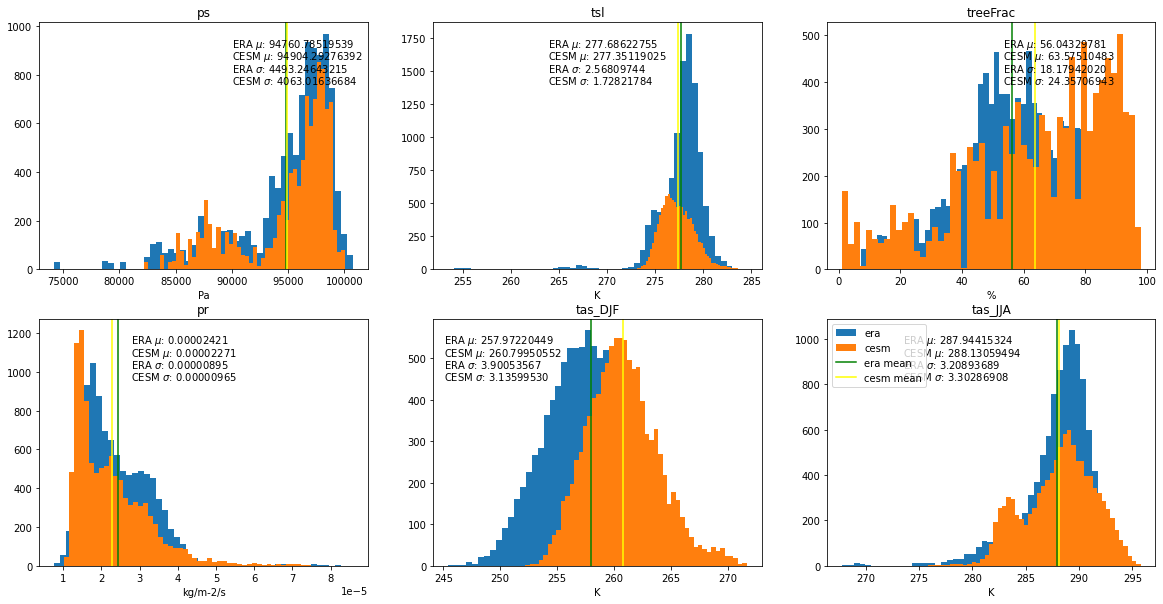

In [68]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(2,3,figsize=(20,10))
ax = ax.flatten()
inputs = ['ps','tsl','treeFrac','pr','tas_DJF','tas_JJA']
input_units = ['Pa','K','%','kg/m-2/s','K','K']
for var_index in range(0,len(inputs)):
    era[inputs[var_index]].hist(ax=ax[var_index],bins=50,label='era')
    cesm[inputs[var_index]].hist(ax=ax[var_index],bins=50,label='cesm')
    ax[var_index].set_xlabel(input_units[var_index])
    ax[var_index].axvline(x=era[inputs[var_index]].mean(),color='green',label='era mean')
    ax[var_index].axvline(x=cesm[inputs[var_index]].mean(),color='yellow',label='cesm mean')
    ax[var_index].title.set_text(inputs[var_index])
    ax[var_index].grid(False)
    # ax[var_index].grid=False
    # plt.hist(era[inputs[var_index]],ax=ax[var_index],bins=100,label='era')
    # plt.hist(cesm[inputs[var_index]],ax=ax[var_index],bins=100,label='cesm')
    min_ylim, max_ylim = ax[var_index].get_ylim()
    print(min_ylim,max_ylim)
    if(inputs[var_index] == 'pr'):
        ax[var_index].text(x=era[inputs[var_index]].mean()*1.15,y=.9*max_ylim,s='ERA $\mu$: {:.8f}'.format(era[inputs[var_index]].mean()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*1.15,y=.85*max_ylim,s='CESM $\mu$: {:.8f}'.format(cesm[inputs[var_index]].mean()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*1.15,y=.80*max_ylim,s='ERA $\sigma$: {:.8f}'.format(era[inputs[var_index]].std()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*1.15,y=.75*max_ylim,s='CESM $\sigma$: {:.8f}'.format(cesm[inputs[var_index]].std()))

    else:
        # ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.9*max_ylim,s='ERA Mean: {:.2f}'.format(era[inputs[var_index]].mean()))
        # ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.85*max_ylim,s='CESM Mean: {:.2f}'.format(cesm[inputs[var_index]].mean()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.9*max_ylim,s='ERA $\mu$: {:.8f}'.format(era[inputs[var_index]].mean()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.85*max_ylim,s='CESM $\mu$: {:.8f}'.format(cesm[inputs[var_index]].mean()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.80*max_ylim,s='ERA $\sigma$: {:.8f}'.format(era[inputs[var_index]].std()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.75*max_ylim,s='CESM $\sigma$: {:.8f}'.format(cesm[inputs[var_index]].std()))

plt.legend()

plt.show()


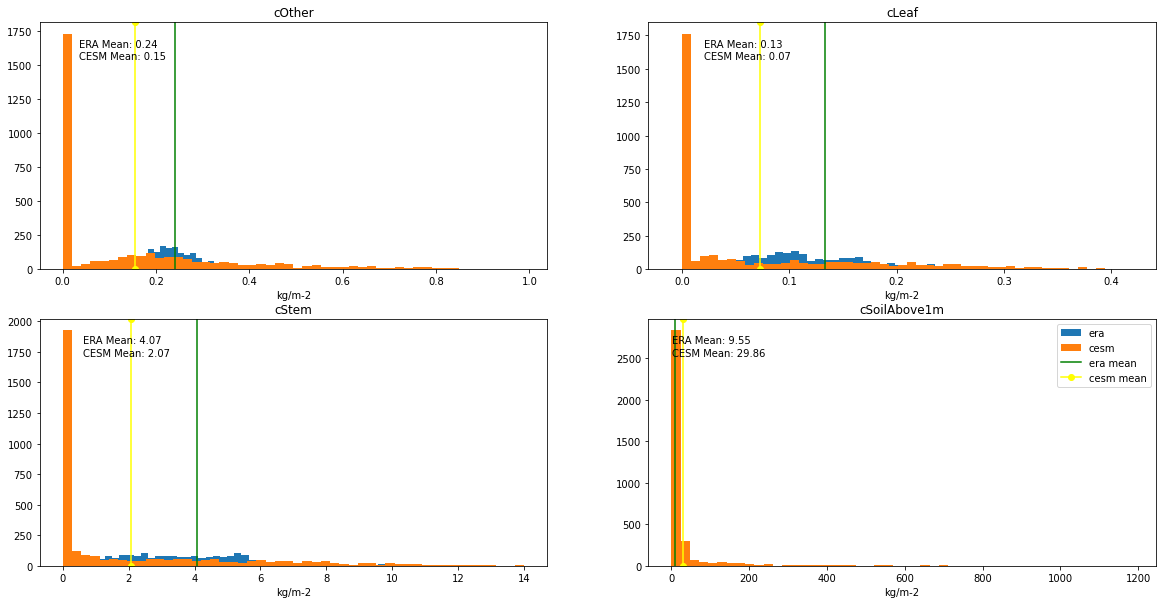

In [69]:
f,ax = plt.subplots(2,2,figsize=(20,10))
ax = ax.flatten()
inputs = ['cOther','cLeaf','cStem','cSoilAbove1m']
input_units = ['kg/m-2','kg/m-2','kg/m-2','kg/m-2']
for var_index in range(0,len(inputs)):
    inferred[inputs[var_index]].hist(ax=ax[var_index],bins=50,label='era')
    cesm_output[inputs[var_index]].hist(ax=ax[var_index],bins=50,label='cesm')
    ax[var_index].set_xlabel(input_units[var_index])
    ax[var_index].axvline(x=inferred[inputs[var_index]].mean(),color='green',label='era mean')
    ax[var_index].axvline(x=cesm_output[inputs[var_index]].mean(),color='yellow',label='cesm mean',marker='o')
    ax[var_index].title.set_text(inputs[var_index])
    ax[var_index].grid(False)
    # ax[var_index].grid=False
    # plt.hist(era[inputs[var_index]],ax=ax[var_index],bins=100,label='era')
    # plt.hist(cesm[inputs[var_index]],ax=ax[var_index],bins=100,label='cesm')
    min_ylim, max_ylim = ax[var_index].get_ylim()
    if(inputs[var_index] == 'pr'):
        ax[var_index].text(x=inferred[inputs[var_index]].mean()*1.15,y=.9*max_ylim,s='ERA Mean: {:.8f}'.format(inferred[inputs[var_index]].mean()))
        ax[var_index].text(x=inferred[inputs[var_index]].mean()*1.15,y=.85*max_ylim,s='CESM Mean: {:.8f}'.format(cesm_output[inputs[var_index]].mean()))
    else:
        ax[var_index].text(x=inferred[inputs[var_index]].mean()*.15,y=.9*max_ylim,s='ERA Mean: {:.2f}'.format(inferred[inputs[var_index]].mean()))
        ax[var_index].text(x=inferred[inputs[var_index]].mean()*.15,y=.85*max_ylim,s='CESM Mean: {:.2f}'.format(cesm_output[inputs[var_index]].mean()))

plt.legend()

plt.show()
